# Clustering (Income data set)

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd
customers_df = pd.read_csv( "C:\Sid7\IMT Hyd\T4\MLAP\End Term\Clustering_ Segmentation - KMeans & Hierarchical\Income Data.csv")

In [5]:
customers_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

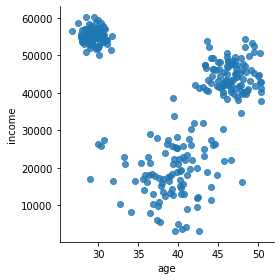

In [7]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );

#plt.title( "Fig 1: Customer Segments Based on Income and Age");

# K-means Clustering

In [9]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df ) #data will fit

#Write as it is and Cluster is var name

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
customers_df["clusterid"] = clusters.labels_ 

#al labels are kept in a diff var

In [13]:
customers_df.head()

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


In [14]:
# 3 clusters as 0,1,2

#  Plotting the customers with their segments

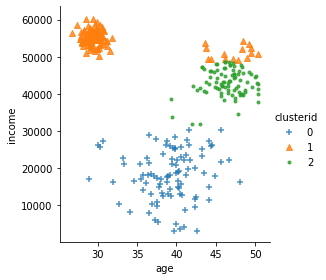

In [15]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 ); 


##  Normalizing the features

In [19]:
from sklearn.preprocessing import StandardScaler 

#for normalising we especially use standardscaler

In [20]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
scaled_customers_df[0:5]

#fit_trans means income and age will normalize and we have used a new var scaler

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [21]:
#in the arrey 1st one is income and values will come under -2 and +2 coz there were three values 0,1,2

In [23]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_ 

#here we are using scaled or normalized data

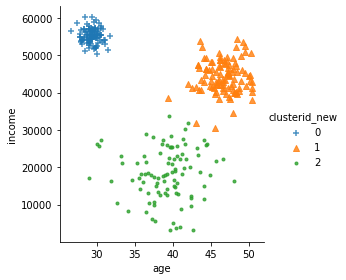

In [24]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );
#plt.title( "Fig 3: Customer segments created after normalization");

In [26]:
clusters.cluster_centers_ 

#finding the locations

array([[1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01],
       [4.30539326e+04, 4.64191011e+01]])

##  Cluster Centers and Interpreting the Clusters

In [28]:
customers_df.groupby( 'clusterid' )['age','income'].agg( ["mean",'std'] ).reset_index() 

#we're grouping the var and getting std deviation and means

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  31.700435  6.122122  54675.652174  2362.224320
2         2  46.419101  2.289620  43053.932584  3613.769632